In [26]:
# نصب کتابخانه‌های لازم
!pip install matplotlib seaborn

In [27]:

# مرحله 1: لود کردن کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [28]:
%cd D:/SourceKaravi/GitHub/NTK.Education.Practice/
!git pull
%cd D:/SourceKaravi/GitHub/NTK.Education.Practice/PatternRecognition/RemoteWorkOnMentalHealth

D:\SourceKaravi\GitHub\NTK.Education.Practice


C:\Users\karavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Already up to date.
D:\SourceKaravi\GitHub\NTK.Education.Practice\PatternRecognition\RemoteWorkOnMentalHealth


In [29]:
# بارگذاری دیتاست (توجه: آدرس فایل خود را وارد کنید)
df = pd.read_csv('D:/SourceKaravi/GitHub/NTK.Education.Practice/PatternRecognition/RemoteWorkOnMentalHealth/Impact_of_Remote_Work_on_Mental_Health.csv')

In [30]:
# مرحله 3: بررسی فیلدهای دیتاست
print(df.head())  # نمایش 5 ردیف اول دیتاست

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

In [31]:
print(df.info())  # اطلاعات کلی درباره دیتاست

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [32]:
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [33]:
#حذف ردیف‌ها: به طور پیش‌فرض، dropna ردیف‌هایی که شامل حداقل یک مقدار ناپایدار هستند را حذف می‌کند.
df  = df.dropna()

In [34]:
df.head(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


In [35]:
#برای استفاده از shape، کافیست به DataFrame یا Series خود دسترسی پیدا کنید و shape را فراخوانی کنید. به عنوان مثال:
df.shape

(2577, 20)

In [36]:
# نمایش نام ستون‌ها
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [37]:
df['Age']

0       32
1       40
6       31
9       30
12      40
        ..
4991    60
4992    55
4994    40
4995    32
4997    42
Name: Age, Length: 2577, dtype: int64

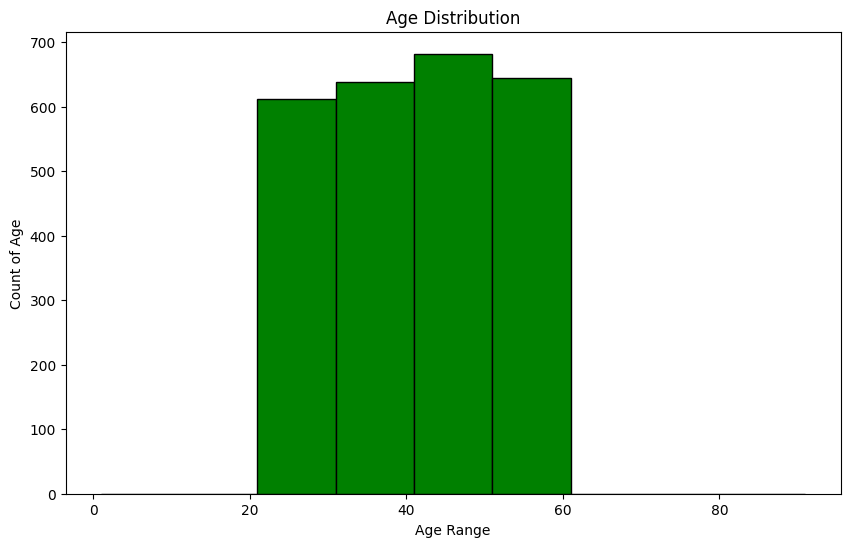

In [38]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'],bins=range(1,101,10),edgecolor='black',color='green')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count of Age')
plt.show()

In [39]:
#در پایتون و با استفاده از کتابخانه pandas، تابع describe() برای تولید آمار توصیفی از داده‌های عددی یک DataFrame به کار می‌رود. این تابع اطلاعاتی مانند تعداد، میانگین، انحراف معیار، کمترین و بیشترین مقدار و همچنین مقادیر چارکی (quartiles) را ارائه می‌دهد.
df['Age'].describe()

count    2577.000000
mean       40.910749
std        11.258183
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

In [40]:
#در پایتون و با استفاده از کتابخانه pandas، تابع unique() برای به‌دست آوردن مقادیر منحصر به فرد (unique values) یک ستون در یک DataFrame یا یک Series استفاده می‌شود. این تابع به شما کمک می‌کند تا ببینید که چه مقادیر مختلفی در یک ستون وجود دارد.
df['Gender'].unique()

array(['Non-binary', 'Female', 'Prefer not to say', 'Male'], dtype=object)

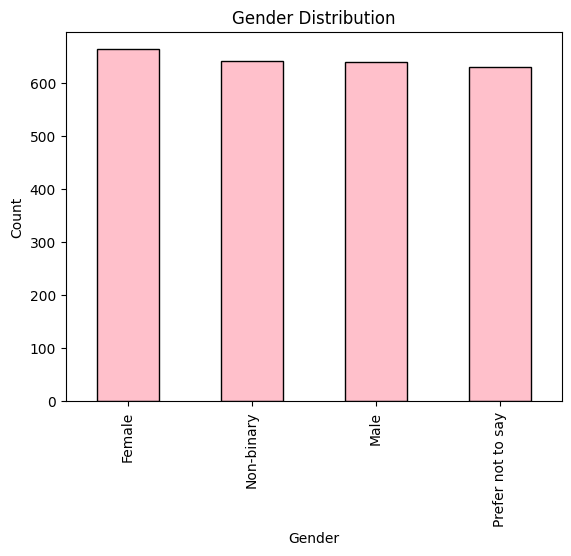

In [41]:
df['Gender'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

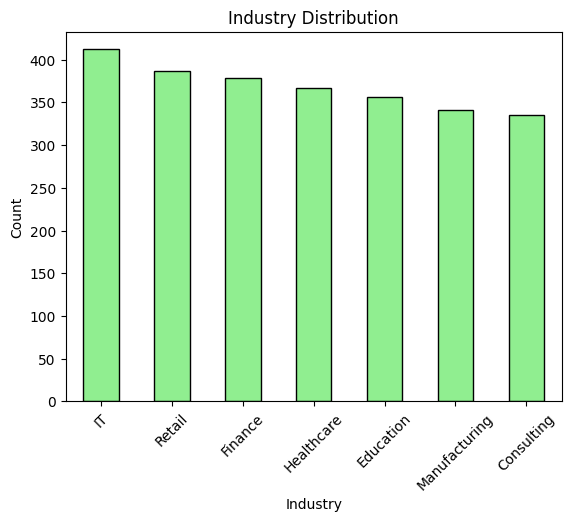

In [42]:
df['Industry'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

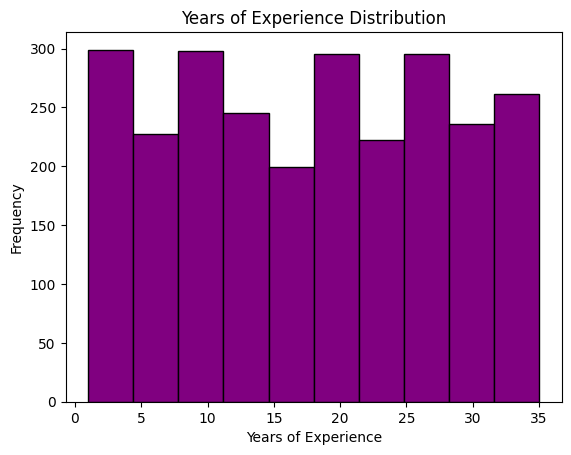

In [43]:
plt.hist(df['Years_of_Experience'], bins=10, color='purple', edgecolor='black')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

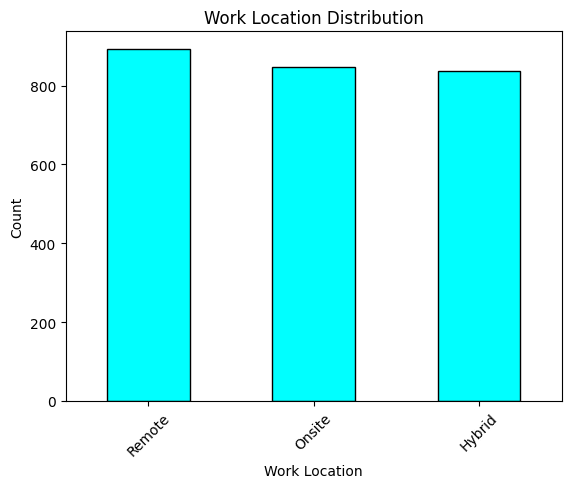

In [44]:
df['Work_Location'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Work Location Distribution')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

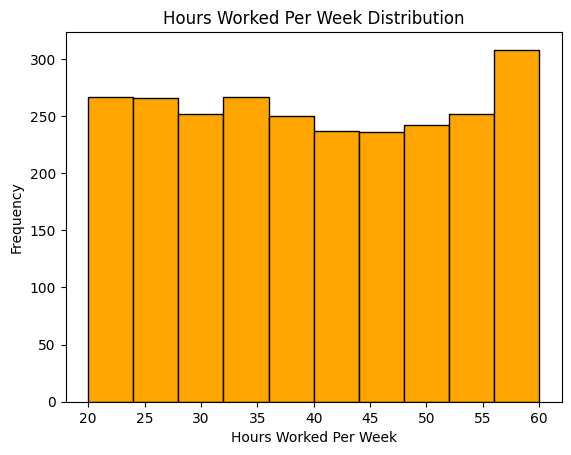

In [45]:
plt.hist(df['Hours_Worked_Per_Week'], bins=10, color='orange', edgecolor='black')
plt.title('Hours Worked Per Week Distribution')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')
plt.show()

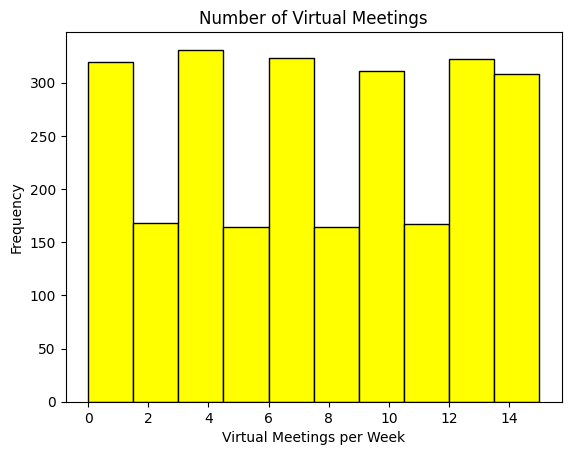

In [46]:
plt.hist(df['Number_of_Virtual_Meetings'], bins=10, color='yellow', edgecolor='black')
plt.title('Number of Virtual Meetings')
plt.xlabel('Virtual Meetings per Week')
plt.ylabel('Frequency')
plt.show()

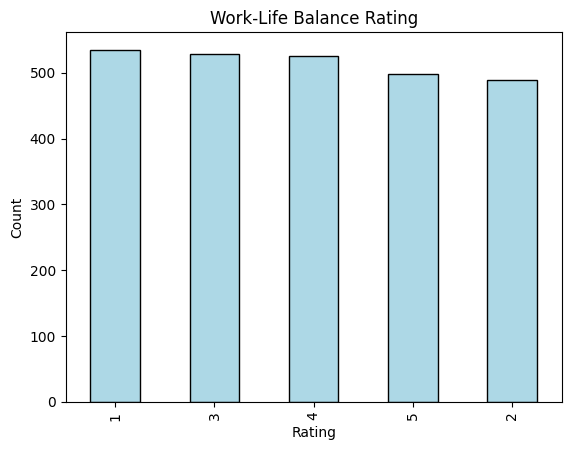

In [47]:
df['Work_Life_Balance_Rating'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Work-Life Balance Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

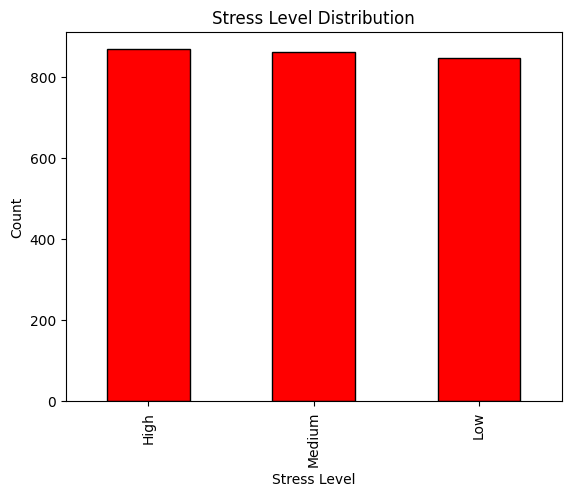

In [48]:
df['Stress_Level'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

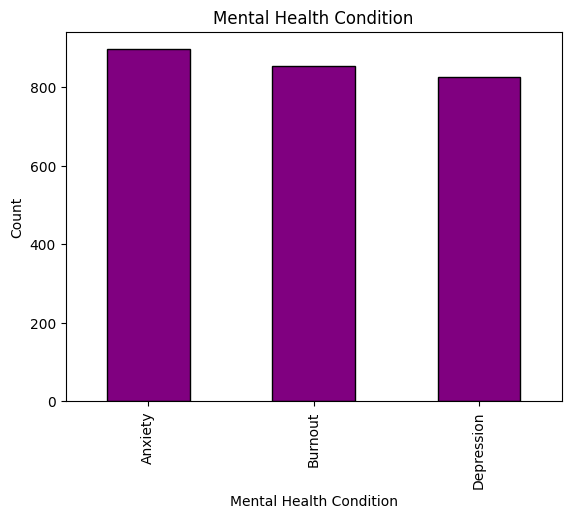

In [49]:
df['Mental_Health_Condition'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

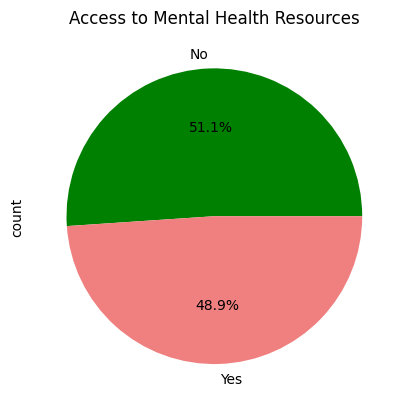

In [50]:
df['Access_to_Mental_Health_Resources'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'lightcoral'])
plt.title('Access to Mental Health Resources')
plt.show()

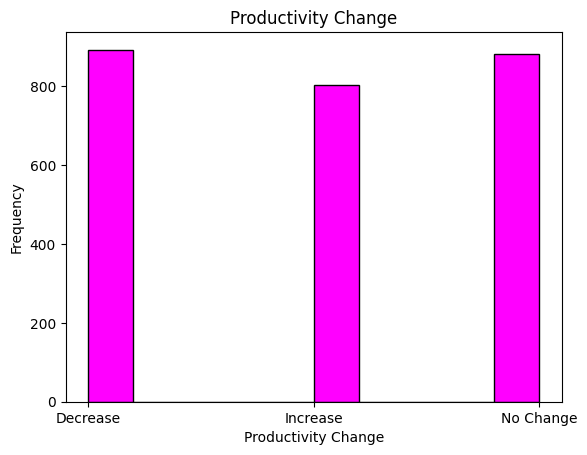

In [51]:
plt.hist(df['Productivity_Change'], bins=10, color='magenta', edgecolor='black')
plt.title('Productivity Change')
plt.xlabel('Productivity Change')
plt.ylabel('Frequency')
plt.show()

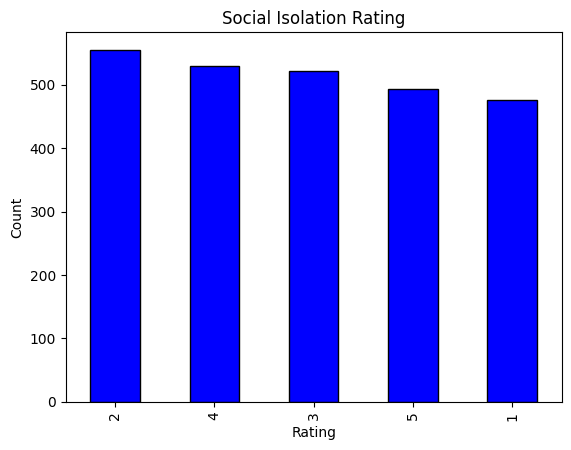

In [52]:
df['Social_Isolation_Rating'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Social Isolation Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

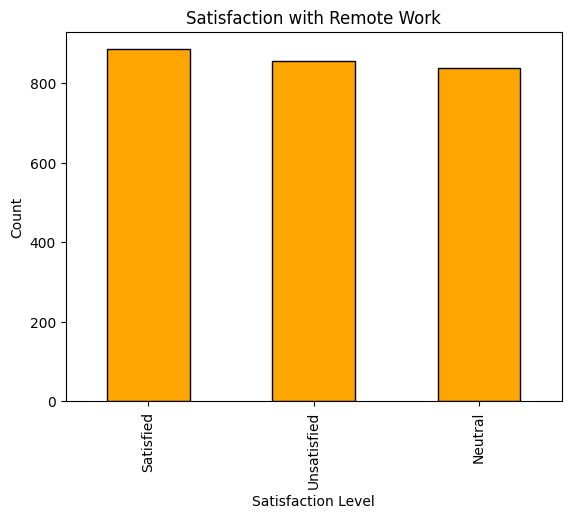

In [53]:
df['Satisfaction_with_Remote_Work'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Satisfaction with Remote Work')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

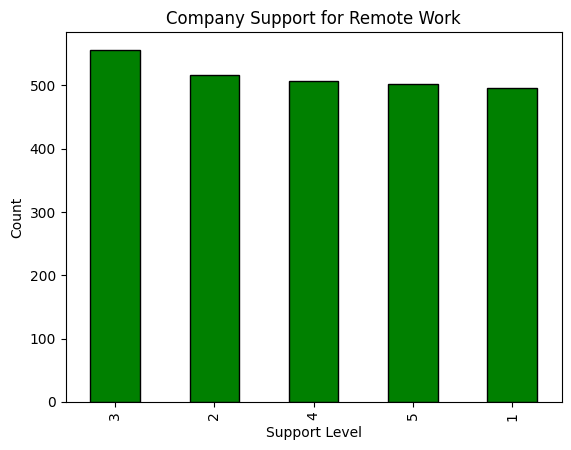

In [54]:
df['Company_Support_for_Remote_Work'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Company Support for Remote Work')
plt.xlabel('Support Level')
plt.ylabel('Count')
plt.show()

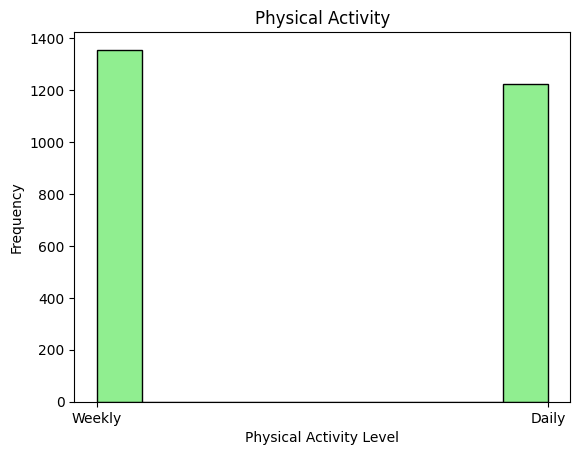

In [55]:
plt.hist(df['Physical_Activity'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Physical Activity')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

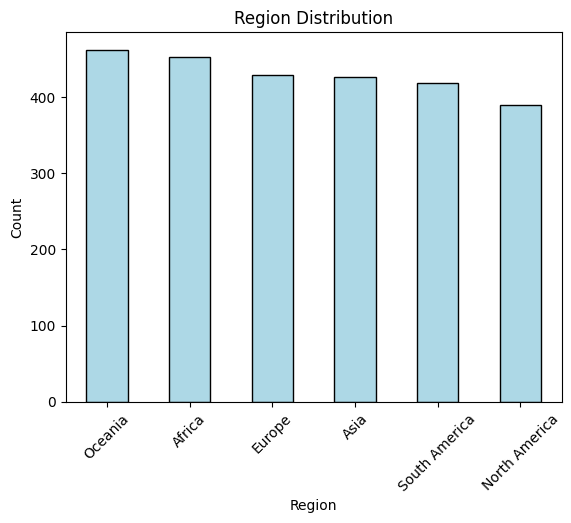

In [56]:
df['Region'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        2577 non-null   object
 1   Age                                2577 non-null   int64 
 2   Gender                             2577 non-null   object
 3   Job_Role                           2577 non-null   object
 4   Industry                           2577 non-null   object
 5   Years_of_Experience                2577 non-null   int64 
 6   Work_Location                      2577 non-null   object
 7   Hours_Worked_Per_Week              2577 non-null   int64 
 8   Number_of_Virtual_Meetings         2577 non-null   int64 
 9   Work_Life_Balance_Rating           2577 non-null   int64 
 10  Stress_Level                       2577 non-null   object
 11  Mental_Health_Condition            2577 non-null   object
 12  Access_to_M

In [ ]:
# تبدیل ستون به نوع int
#df['Work_Location'] = df['Work_Location'].map({'Onsite':1, 'Remote': 2,'Hybrid': 3 })
#df['Work_Location'] = df['Work_Location'].astype(int)
# تبدیل ستون به نوع int
#df['Stress_Level'] = df['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
#df['Stress_Level'] = df['Stress_Level'].astype(int)

In [62]:
# Drop Employee_ID
#df = df.drop('Employee_ID', axis=1)

In [63]:
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location',
                       'Stress_Level', 'Mental_Health_Condition',
                       'Access_to_Mental_Health_Resources',
                       'Productivity_Change', 'Satisfaction_with_Remote_Work',
                       'Sleep_Quality', 'Region']
#df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded = df[categorical_columns] 

In [64]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             2577 non-null   int64
 1   Job_Role                           2577 non-null   int64
 2   Industry                           2577 non-null   int64
 3   Work_Location                      2577 non-null   int64
 4   Stress_Level                       2577 non-null   int64
 5   Mental_Health_Condition            2577 non-null   int64
 6   Access_to_Mental_Health_Resources  2577 non-null   int64
 7   Productivity_Change                2577 non-null   int64
 8   Satisfaction_with_Remote_Work      2577 non-null   int64
 9   Sleep_Quality                      2577 non-null   int64
 10  Region                             2577 non-null   int64
dtypes: int64(11)
memory usage: 241.6 KB


In [65]:
#LabelEncoder یکی از کلاس‌های موجود در کتابخانه sklearn.preprocessing در پایتون است که برای تبدیل برچسب‌های متنی (categorical labels) به مقادیر عددی استفاده می‌شود. این تبدیل به خصوص در مدل‌های یادگیری ماشین لازم است، زیرا بسیاری از الگوریتم‌ها تنها با داده‌های عددی کار می‌کنند.
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to the 'Physical_Activity' column
#df_encoded['Physical_Activity'] = le.fit_transform(df_encoded['Physical_Activity'])
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Job_Role'] = le.fit_transform(df_encoded['Job_Role'])
df_encoded['Industry'] = le.fit_transform(df_encoded['Industry'])
df_encoded['Work_Location'] = le.fit_transform(df_encoded['Work_Location'])
df_encoded['Stress_Level'] = le.fit_transform(df_encoded['Stress_Level'])
df_encoded['Mental_Health_Condition'] = le.fit_transform(df_encoded['Mental_Health_Condition'])
df_encoded['Access_to_Mental_Health_Resources'] = le.fit_transform(df_encoded['Access_to_Mental_Health_Resources'])
df_encoded['Productivity_Change'] = le.fit_transform(df_encoded['Productivity_Change'])
df_encoded['Satisfaction_with_Remote_Work'] = le.fit_transform(df_encoded['Satisfaction_with_Remote_Work'])    
df_encoded['Sleep_Quality'] = le.fit_transform(df_encoded['Sleep_Quality'])
df_encoded['Region'] = le.fit_transform(df_encoded['Region'])                                 

C:\Users\karavi\AppData\Local\Temp\ipykernel_30272\1355549010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
C:\Users\karavi\AppData\Local\Temp\ipykernel_30272\1355549010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Job_Role'] = le.fit_transform(df_encoded['Job_Role'])
C:\Users\karavi\AppData\Local\Temp\ipykernel_30272\1355549010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [66]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             2577 non-null   int64
 1   Job_Role                           2577 non-null   int64
 2   Industry                           2577 non-null   int64
 3   Work_Location                      2577 non-null   int64
 4   Stress_Level                       2577 non-null   int64
 5   Mental_Health_Condition            2577 non-null   int64
 6   Access_to_Mental_Health_Resources  2577 non-null   int64
 7   Productivity_Change                2577 non-null   int64
 8   Satisfaction_with_Remote_Work      2577 non-null   int64
 9   Sleep_Quality                      2577 non-null   int64
 10  Region                             2577 non-null   int64
dtypes: int64(11)
memory usage: 241.6 KB


In [67]:
#print(df_encoded.head())
df_encoded.head()

,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Sleep_Quality,Region
0,2,2,3,0,2,2,0,0,2,1,2
1,0,0,4,2,2,0,0,1,1,1,1
6,3,5,4,2,1,0,1,0,0,2,1
9,0,2,4,0,1,2,1,0,0,2,3
12,0,3,0,2,0,2,1,0,0,1,2


In [68]:
# Separate features and targets
X = df_encoded.drop(['Stress_Level', 'Productivity_Change'], axis=1)
y = df_encoded[['Stress_Level', 'Productivity_Change']]  # Adjust based on your needs

In [69]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_model = MultiOutputClassifier(rf_model, n_jobs=-1)

In [72]:
multi_target_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [73]:
y_pred = multi_target_model.predict(X_test)


In [74]:
y_test['Stress_Level']

2202    1
1813    0
1476    1
592     2
2604    1
       ..
4539    0
619     0
4222    2
4775    0
3827    2
Name: Stress_Level, Length: 774, dtype: int64

In [75]:
print("Classification Report for Stress Level:")
print(classification_report(y_test['Stress_Level'], y_pred[:, 0], target_names=['Low_Stress', 'Medium_Stress','High_Stress']))

Classification Report for Stress Level:
               precision    recall  f1-score   support

   Low_Stress       0.34      0.34      0.34       259
Medium_Stress       0.30      0.30      0.30       251
  High_Stress       0.33      0.33      0.33       264

     accuracy                           0.32       774
    macro avg       0.32      0.32      0.32       774
 weighted avg       0.32      0.32      0.32       774



In [76]:
y_test['Productivity_Change']

2202    0
1813    1
1476    1
592     2
2604    0
       ..
4539    1
619     0
4222    1
4775    0
3827    2
Name: Productivity_Change, Length: 774, dtype: int64

In [77]:
print("\nClassification Report for Productivity Change:")
print(classification_report(y_test['Productivity_Change'], y_pred[:, 1], target_names=['Decrease_Prod','Increase_Prod','No Change']))


Classification Report for Productivity Change:
               precision    recall  f1-score   support

Decrease_Prod       0.32      0.34      0.33       270
Increase_Prod       0.27      0.26      0.27       228
    No Change       0.30      0.29      0.29       276

     accuracy                           0.30       774
    macro avg       0.30      0.30      0.30       774
 weighted avg       0.30      0.30      0.30       774



In [84]:
y_pred


array([[2, 1],
       [0, 1],
       [2, 0],
       ...,
       [0, 2],
       [2, 0],
       [0, 0]])

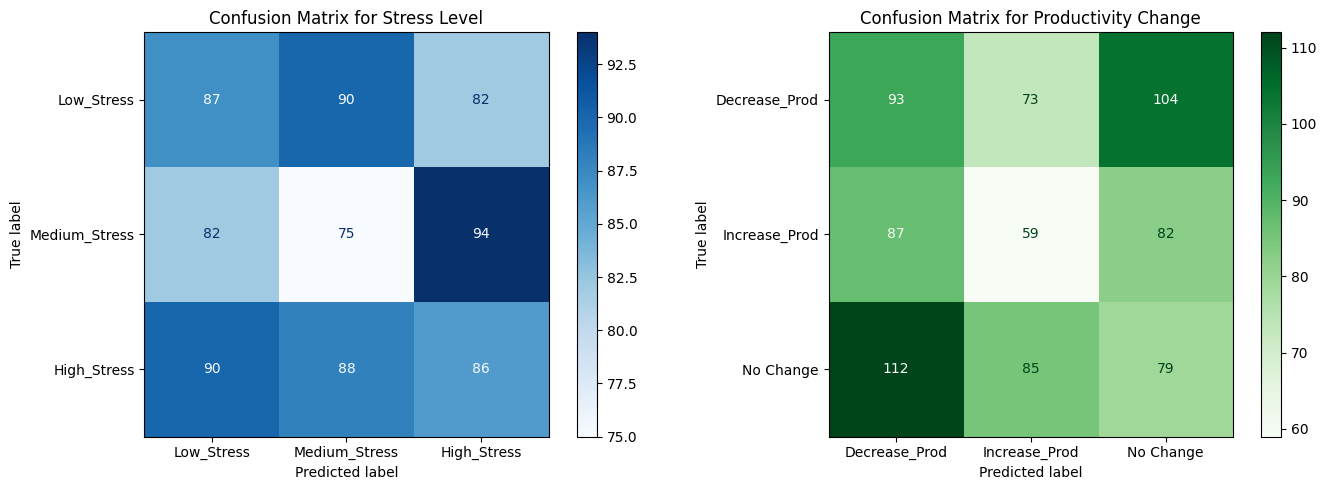

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test['Stress_Level'],
    y_pred[:, 0],
    display_labels=['Low_Stress', 'Medium_Stress','High_Stress'],
    cmap='Blues',
    ax=ax[0]
)
ax[0].set_title("Confusion Matrix for Stress Level")


# Plot confusion matrix for Productivity Change
ConfusionMatrixDisplay.from_predictions(
    y_test['Productivity_Change'],
    y_pred[:, 1],
    display_labels=['Decrease_Prod','Increase_Prod','No Change'],
    cmap='Greens',
    ax=ax[1]
)
ax[1].set_title("Confusion Matrix for Productivity Change")

plt.tight_layout()
plt.show()

In [79]:

# تعداد خوشه‌ها
n_clusters = 3

# اجرای الگوریتم K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [80]:

# محاسبه نمره سیلوئت
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.17256096571818685


In [81]:
# محاسبه MSE
mse_list = []
for i in range(n_clusters):
    cluster_points = X[y_kmeans == i]
    cluster_center = kmeans.cluster_centers_[i]
    mse = mean_squared_error(cluster_points, [cluster_center] * len(cluster_points))
    mse_list.append(mse)

print("Mean Squared Error for each cluster:")
for i, mse in enumerate(mse_list):
    print(f"Cluster {i}: MSE = {mse}")

Mean Squared Error for each cluster:
Cluster 0: MSE = 1.1621601838170856
Cluster 1: MSE = 1.0375589543831523
Cluster 2: MSE = 1.1883954418699545


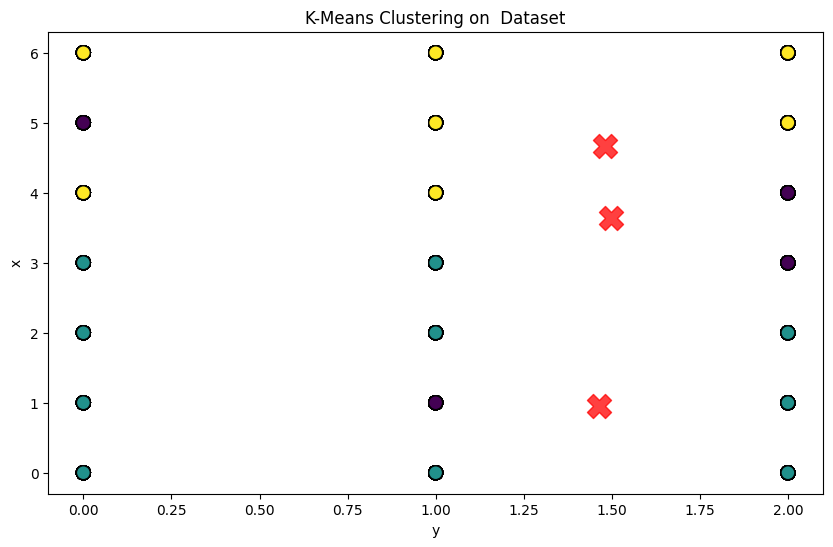

In [82]:
# نمایش نتایج
plt.figure(figsize=(10, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(X['Mental_Health_Condition'], X['Industry'], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-Means Clustering on  Dataset')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

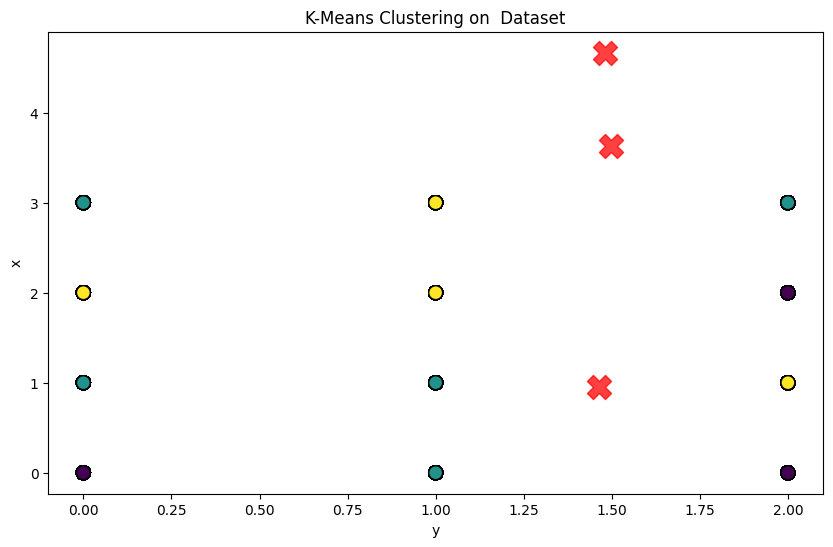

In [83]:
# نمایش نتایج
plt.figure(figsize=(10, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(X['Mental_Health_Condition'], X['Gender'], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-Means Clustering on  Dataset')
plt.xlabel('y')
plt.ylabel('x')
plt.show()